<center><h1><font color="orange">Simpson's Recognition</font></h1></center>
<center><h2>Using Deep Learning to Recognize Simpson's Characters</h2></center>

<h4>Step 1: Download Data</h4>
<p>First, we need to download the Simpson's image data from <a>https://www.kaggle.com/alexattia/the-simpsons-characters-dataset/version/4#characters_illustration.png</a>.</p>
<img src="Images/download_data.png" style="width:50%;height:50%"/>

<p>Next, move the downlaoded folder into your project directory (mine is called Simpsons_Recognition)and unzip the file that says simpsons_dataset.zip. Your directory should now look like:</p>
<img src = "Images/data_download_structure.png" style="width:50%;height:50%"/>

<h4>Imports:</h4>

In [3]:
#Data Handling Imports
import pandas as pd 
import numpy as np

#File handling imports
import glob 

#Image handling imports 
import PIL
from PIL import Image

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sn

#Machine Learning Imports
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Deep Learning Imports
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

<h4>Load Data:</h4>
<p>We will use a the glob library to look through all subdirectories and extract the images.</p>

In [4]:
def load_data(direc,rx=64,ry=64):
    
    #Store the images with their label
    labels = []
    images = []
    
    #Look through the nested subdirectories to find all files
    nested_directories = glob.glob(direc+"*/")
    for direc in nested_directories: 
        image_filename = glob.glob(direc+"/*") 
        for file in image_filename:
            #Resize the images to all be the samee size
            im = np.array(Image.open(file).resize([rx,ry],PIL.Image.ANTIALIAS))
            images.append(im)
            label = direc.split("/")[-2]
            labels.append(label)
    
    #Convert the images and labels to numpy arrays
    labels = np.array(labels)
    images = np.array(images)
    return images, labels

direc = "the-simpsons-characters-dataset/simpsons_dataset/"
images, labels = load_data(direc)

<h4>View Images:</h4>

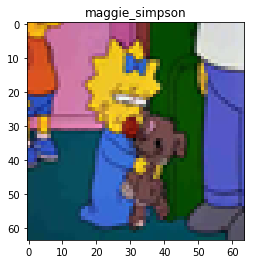

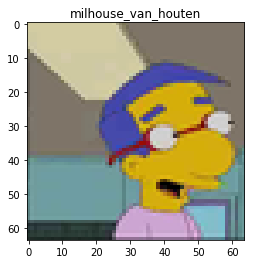

In [5]:
plt.imshow(images[100])
plt.title(labels[100])
plt.show()
plt.imshow(images[3501])
plt.title(labels[3501])
plt.show()

<h4>View Data Distribution:</h4>
<p>We see that we have imbalanced data across the different Simpson's characters. With Machine Learning it is always better to have balanced classes. However, we have a trick we can use for this.</p>

In [6]:
pd.DataFrame(labels)[0].value_counts().head(20)

homer_simpson               2246
ned_flanders                1454
moe_szyslak                 1452
lisa_simpson                1354
bart_simpson                1342
marge_simpson               1291
krusty_the_clown            1206
principal_skinner           1194
charles_montgomery_burns    1193
milhouse_van_houten         1079
chief_wiggum                 986
abraham_grampa_simpson       913
sideshow_bob                 877
apu_nahasapeemapetilon       623
kent_brockman                498
comic_book_guy               469
edna_krabappel               457
nelson_muntz                 358
lenny_leonard                310
mayor_quimby                 246
Name: 0, dtype: int64

<h4>Normalize Data:</h4>

In [7]:
images = images / 255.

<h4>Train/Test Data:</h4>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state=42)

<h4>Get Class Weights:</h4>
<p>We can assign class weights to our data and give the samples that have less data more importance and the samples that have too much data less importance.</p>

In [9]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(labels),y_train)

<h4>One Hot Features:</h4>
<p>We need to convert our labels into a format that the machine can understand. We do so by creating one hot vectors.</p>

In [10]:
y_train_one_hot = pd.get_dummies(y_train).values
y_test_one_hot = pd.get_dummies(y_test).values

<h4>Lookup:</h4>
<p>So we can see what labeel the prediction indexes map to.</p>

In [11]:
reverse_lookup = pd.get_dummies(y_train).columns.values.tolist()

<h4>CNN:</h4>
<p>Create a Convolutional Neural Network and train it.</p>

In [13]:
def create_model(X_train,y_train):
    #The input and output shape of our model
    input_shape = X_train[0].shape
    output_shape = len(y_train[0])
    
    #The CNN model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

#Instantiate Deep Learning Model
model = create_model(X_train,y_train_one_hot)

#Model Training Parameters 
batch_size = 16 
num_epochs = 15

#Train Model
model.fit(X_train, y_train_one_hot,batch_size=batch_size,epochs=num_epochs,class_weight=class_weights)

Epoch 1/15
16746/16746 [==============================] - 80s 5ms/step - loss: 2.4751 - acc: 0.3163
Epoch 2/15
16746/16746 [==============================] - 91s 5ms/step - loss: 1.5438 - acc: 0.5795
Epoch 3/15
16746/16746 [==============================] - 85s 5ms/step - loss: 1.1203 - acc: 0.6894
Epoch 4/15
16746/16746 [==============================] - 90s 5ms/step - loss: 0.8594 - acc: 0.7567
Epoch 5/15
16746/16746 [==============================] - 85s 5ms/step - loss: 0.6433 - acc: 0.8180
Epoch 6/15
16746/16746 [==============================] - 83s 5ms/step - loss: 0.4791 - acc: 0.8579
Epoch 7/15
16746/16746 [==============================] - 89s 5ms/step - loss: 0.3611 - acc: 0.8915
Epoch 8/15
16746/16746 [==============================] - 87s 5ms/step - loss: 0.2865 - acc: 0.9139
Epoch 9/15
16746/16746 [==============================] - 92s 5ms/step - loss: 0.2375 - acc: 0.9231
Epoch 10/15
16746/16746 [==============================] - 83s 5ms/step - loss: 0.1877 - acc: 0.9393

<h4>Model Performance:</h4>
<p>Get the Predictions on our Test Set.</p>

In [15]:
#Get the predictions from our model
preds = model.predict(X_test)

#Convert the predictions to a one hot encoded vector 
one_hot_prds = np.zeros_like(preds)
one_hot_prds[np.arange(len(preds)), preds.argmax(1)] = 1

#Compare the predictions to the test labels to get the Test Classification Accuracy
test_acc = accuracy_score(y_test_one_hot,one_hot_prds)
print(test_acc)

0.7499402913780749


<h4>View Some Results:</h4>

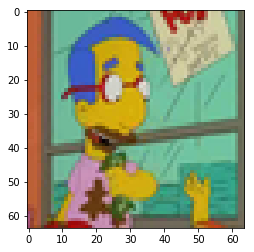

Prediction:  milhouse_van_houten
Actual:  milhouse_van_houten



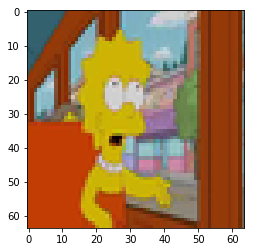

Prediction:  lisa_simpson
Actual:  lisa_simpson



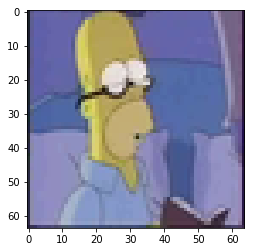

Prediction:  krusty_the_clown
Actual:  homer_simpson



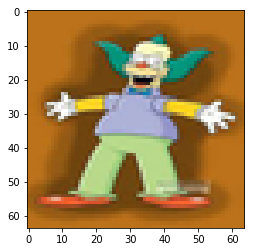

Prediction:  krusty_the_clown
Actual:  krusty_the_clown



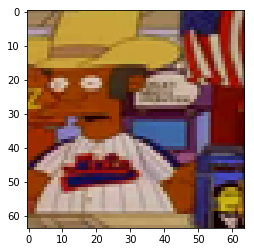

Prediction:  apu_nahasapeemapetilon
Actual:  apu_nahasapeemapetilon



In [16]:
#Visualizee Test Output
for i in range(5):
    plt.imshow(X_test[i,:])
    plt.show()
    pred =  model.predict_classes(X_test[i:i+1])[0]
    print("Prediction: ",reverse_lookup[pred])
    print("Actual: ", reverse_lookup[np.argmax(y_test_one_hot[i])])
    print()